# 효과적인 담배 예방 및 통제 플로그램을 개발 및 구현하고 진행 상황을 모니터링
**금연을 원하는 사람, 금연시도, 금연 성공, 금연을 원하는 흡연자들의 정보를 통한 금연 프로젝트 여부**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#colab의 구드 계정 연결

Mounted at /content/drive


**인도 청소년 흡연에 관한 데이터 불러오기**

In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/대청캠/데이터파일/조별과제 데이터/인도 청소년 흡연량.csv")
data

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other people’s tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%)
0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Uttarakhand,Total,31.4,18.5,26.6,17.2,13.2,7.3,14.3,5.6,...,16.7,27.5,25.4,63.4,50.7,56.5,50.0,14.3,67.9,60.7
103,Uttarakhand,Urban,39.5,25.7,35.9,24.8,19.4,9.7,22.2,7.7,...,22.4,35.3,35.4,67.7,60.6,67.4,42.9,0.0,42.9,57.1
104,Uttarakhand,Rural,28.2,15.7,22.9,14.2,10.7,6.3,11.3,4.8,...,14.4,24.4,21.5,61.7,46.9,52.2,52.4,19.1,76.2,61.9
105,West Bengal,Total,17.3,7.1,9.3,5.2,5.4,3.6,5.5,2.9,...,21.0,25.1,19.9,73.7,48.1,49.3,94.3,65.7,85.7,91.4


**금연을 원하는 사람, 금연시도, 금연 성공, 금연을 원하는 흡연자들의 정보**

In [3]:
ns_data = pd.concat([data.iloc[:, 0:2], data.iloc[:, 19:25]], axis=1)



**(순서대로 column index 번역) '지난 12개월 동안 담배를 끊은 흡연자는 누구나(%),'최근 12개월 동안 금연을 시도한 현재 흡연자(%),'금연을 원하는 현재 흡연자(%)','지난 12개월 동안 담배를 끊은 무연 담배 사용자는 누구나(%),'최근 12개월 동안 금연을 시도한 무연 담배 사용자(%),'지금 담배를 끊고 싶어하는 현재 금연 담배 사용자(%),**

**각 데이터는 지역 별로 시내의 데이터와 교외의 데이터 그리고 이를 합친 총합 데이터 세개의 확률데이터를 나타낸다. 우린 이 중 총합 데이터만 사용하기로 한다.**

In [4]:
total_data = ns_data[ns_data['Area'] == 'Total']
total_data = total_data.dropna()
total_data


,State/UT,Area,Ever tobacco smokers who quit in last 12 months (%),Current tobacco smokers who tried to quit smoking in the past 12 months (%),Current tobacco smokers who wanted to quit smoking now (%),Ever smokeless tobacco users who quit in last 12 months (%),Current smokeless tobacco users who tried to quit tobacco in the past 12 months (%),Current smokeless tobacco users who wanted to quit tobacco now (%)
0,India,Total,10.6,20.0,20.6,9.4,26.7,24.8
3,Andaman and Nicobar Islands,Total,19.8,32.9,30.9,4.6,16.3,11.1
6,Andhra Pradesh,Total,12.8,36.6,30.4,12.2,23.4,36.5
9,Arunachal Pradesh,Total,22.6,35.1,23.8,17.8,20.4,16.8
12,Assam,Total,11.6,14.9,22.9,20.0,20.0,17.5
15,Bihar,Total,5.1,23.6,28.9,1.5,12.4,17.2
18,Chandigarh,Total,10.4,22.6,13.4,5.7,12.1,14.1
21,Chhattisgarh,Total,18.5,23.1,29.0,23.7,37.7,21.3
24,Dadra and Nagar Haweli,Total,22.3,57.1,52.1,80.0,67.4,65.2
27,Daman and Diu,Total,9.7,28.6,29.7,27.4,24.0,49.4


In [5]:
total_data.set_index(['State/UT', 'Area'], inplace=True)

**데이터 별로 그래프를 그려보자**

<ipython-input-6-baba6532d5eb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_data['Ever tobacco smokers who quit in last 12 months (%)'])


Text(0.5, 1.0, 'Ever tobacco smokers who quit in last 12 months (%)')

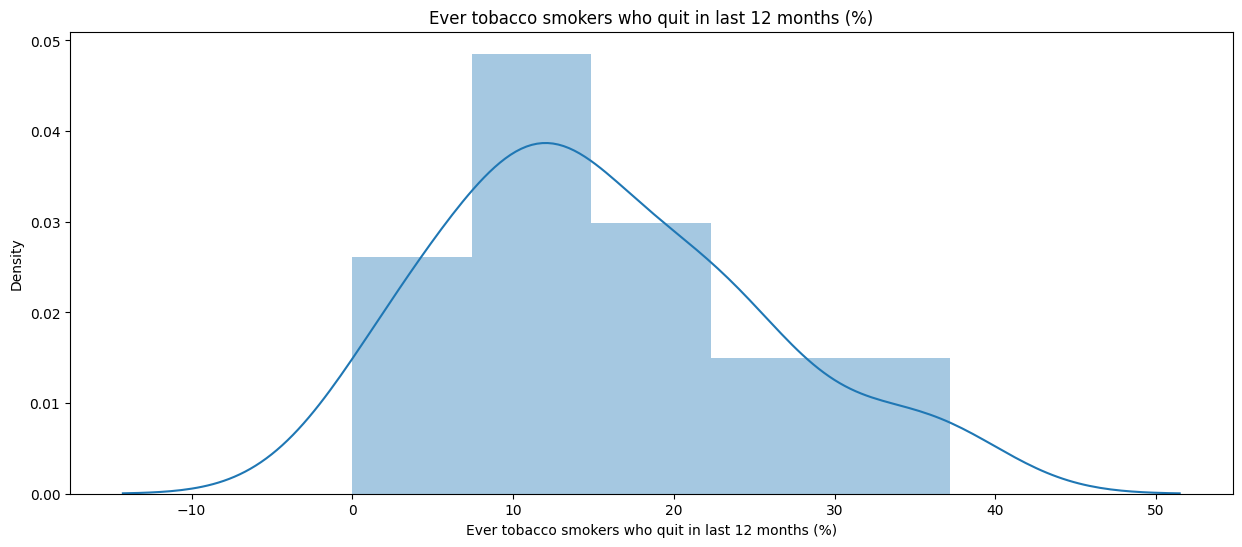

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(15,6 ))
sns.distplot(total_data['Ever tobacco smokers who quit in last 12 months (%)'])
plt.title('Ever tobacco smokers who quit in last 12 months (%)')

<ipython-input-7-64be5e884918>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_data['Current tobacco smokers who tried to quit smoking in the past 12 months (%)'])


Text(0.5, 1.0, 'Current tobacco smokers who tried to quit smoking in the past 12 months (%)')

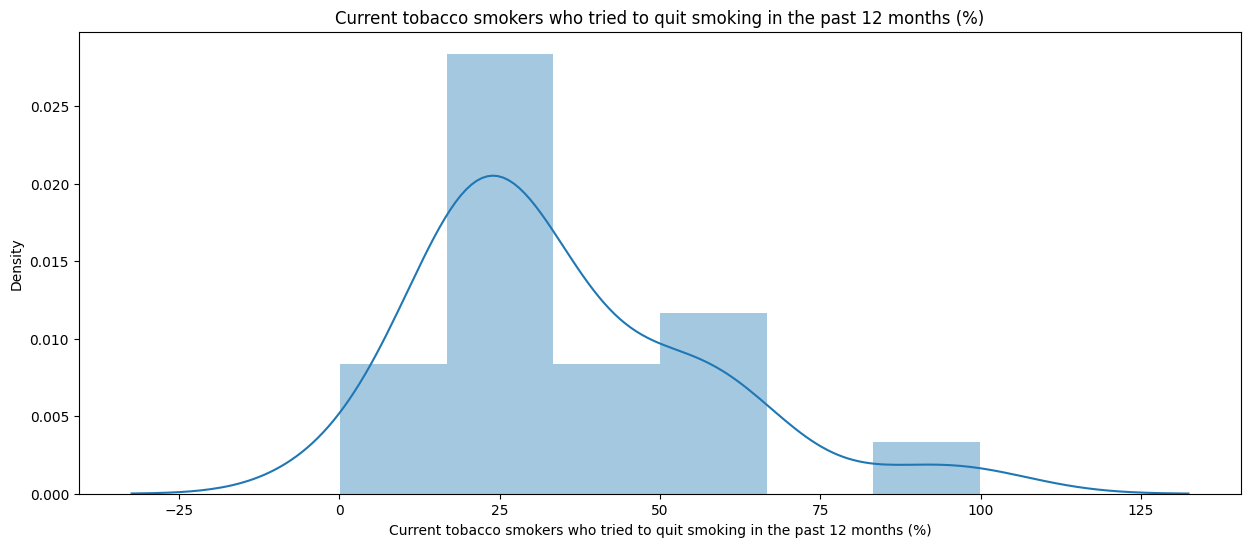

In [7]:
plt.figure(1, figsize=(15,6 ))
sns.distplot(total_data['Current tobacco smokers who tried to quit smoking in the past 12 months (%)'])
plt.title('Current tobacco smokers who tried to quit smoking in the past 12 months (%)')

<ipython-input-8-ff94c17100fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_data['Current tobacco smokers who wanted to quit smoking now   (%)'])


Text(0.5, 1.0, 'Current tobacco smokers who wanted to quit smoking now   (%)')

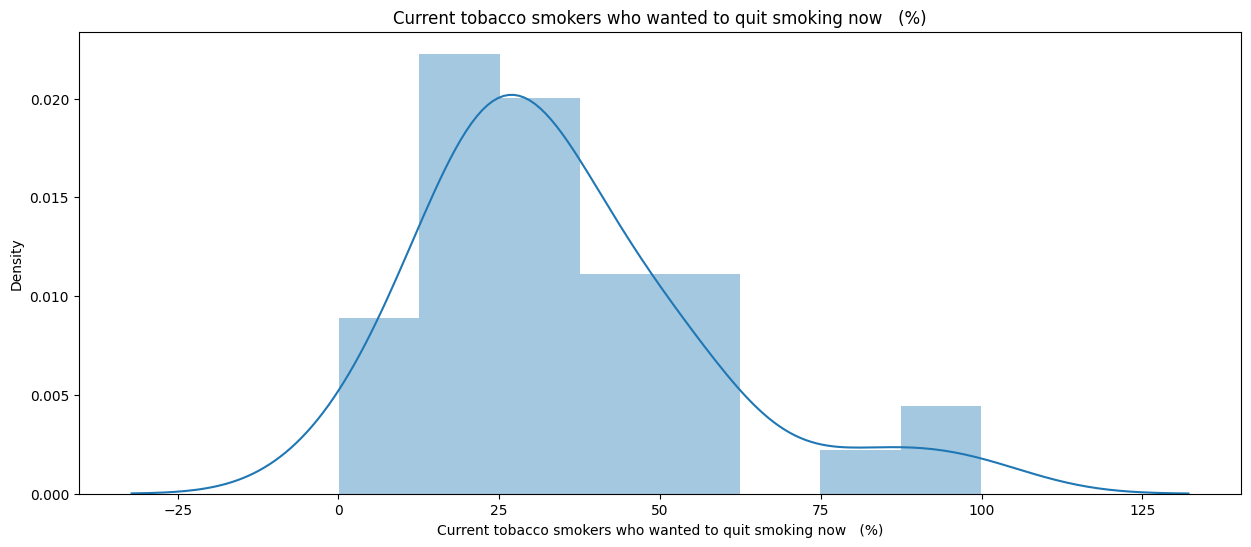

In [8]:
plt.figure(1, figsize=(15,6 ))
sns.distplot(total_data['Current tobacco smokers who wanted to quit smoking now   (%)'])
plt.title('Current tobacco smokers who wanted to quit smoking now   (%)')

<ipython-input-9-1c2bb9c23c5e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_data['Ever  smokeless tobacco users who quit  in last 12 months (%)'])


Text(0.5, 1.0, 'Ever  smokeless tobacco users who quit  in last 12 months (%)')

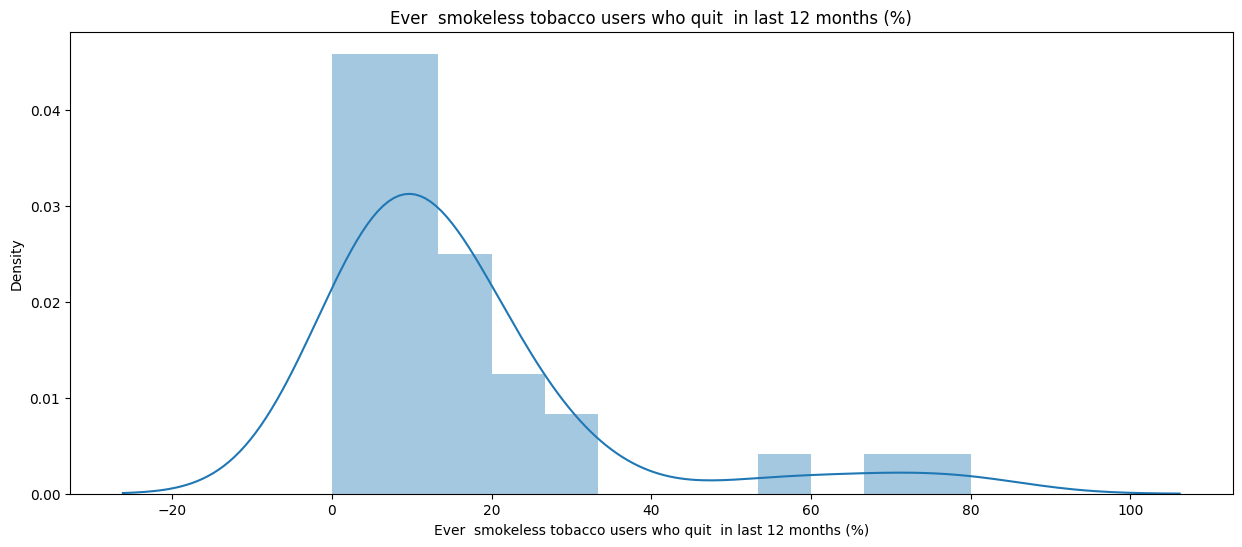

In [9]:
plt.figure(1, figsize=(15,6 ))
sns.distplot(total_data['Ever  smokeless tobacco users who quit  in last 12 months (%)'])
plt.title('Ever  smokeless tobacco users who quit  in last 12 months (%)')

<ipython-input-10-195b1cb188f9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_data['Current smokeless tobacco users who tried to quit tobacco in the past 12 months   (%)'])


Text(0.5, 1.0, 'Current smokeless tobacco users who tried to quit tobacco in the past 12 months   (%)')

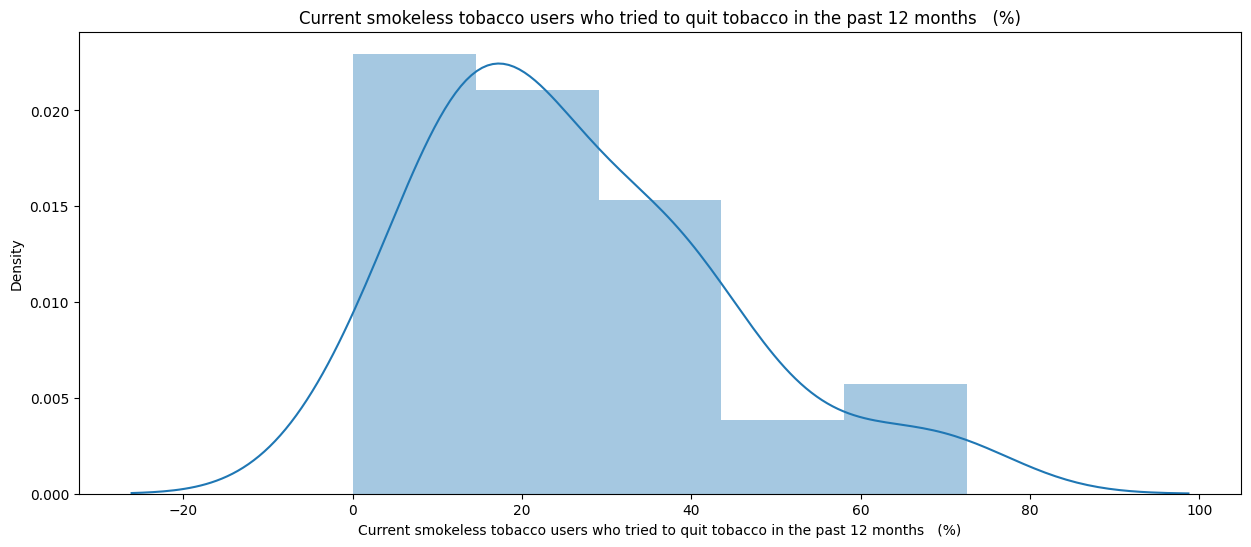

In [10]:
plt.figure(1, figsize=(15,6 ))
sns.distplot(total_data['Current smokeless tobacco users who tried to quit tobacco in the past 12 months   (%)'])
plt.title('Current smokeless tobacco users who tried to quit tobacco in the past 12 months   (%)')

<ipython-input-11-bc388ea06c98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_data['Current  smokeless tobacco users who wanted to quit tobacco now     (%)'])


Text(0.5, 1.0, 'Current  smokeless tobacco users who wanted to quit tobacco now     (%)')

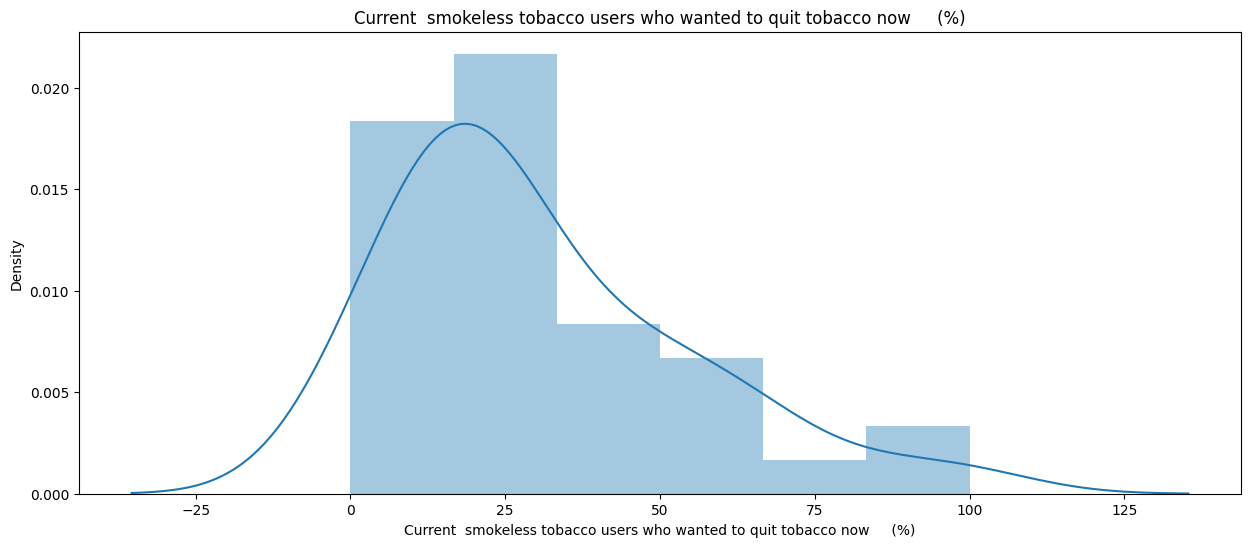

In [11]:
plt.figure(1, figsize=(15,6 ))
sns.distplot(total_data['Current  smokeless tobacco users who wanted to quit tobacco now     (%)'])
plt.title('Current  smokeless tobacco users who wanted to quit tobacco now     (%)')

**K-Means를 사용한 클러스터링**

1. 클러스터링에 최적화된 K값 도출

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

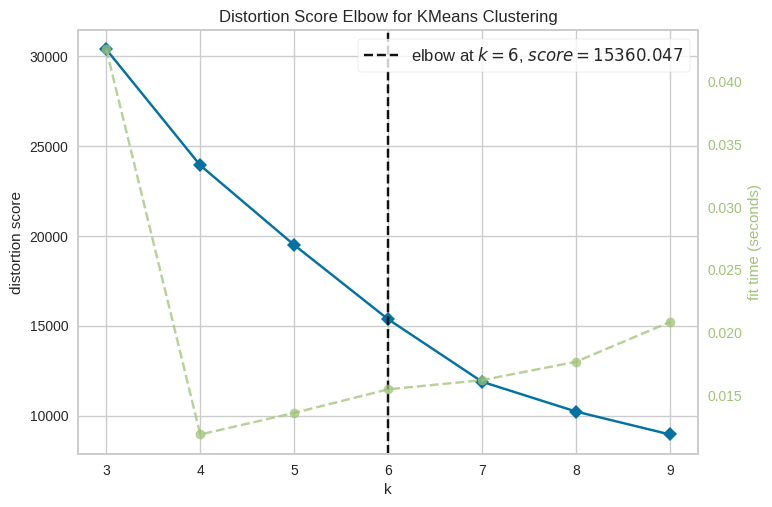

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
KE = KElbowVisualizer(KMeans(), k= (3,10),random_state = 42)
KE.fit(total_data)
KE.show()

위 그래프를 통해 알수 있는 최적의 K값은 6이다.  이를 시각화 하기 위해서는 PCA를 사용하여 차원 축소가 진행되어야 한다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


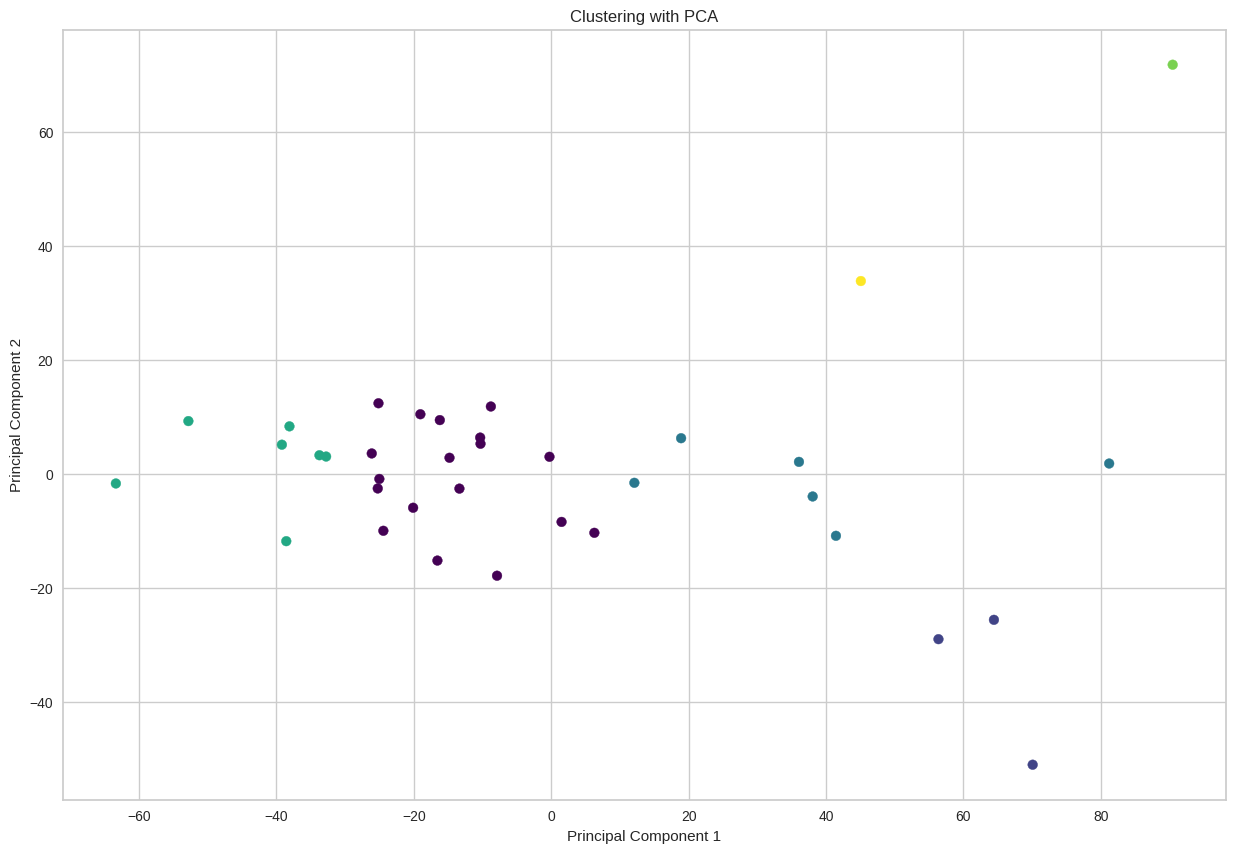

In [13]:
import numpy as np
from sklearn.decomposition import PCA
mdl = KMeans(n_clusters = 6, random_state=42)
mdl.fit(total_data)
clusters = mdl.predict(total_data)
total_data['cluster_kmeans'] = mdl.labels_
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(total_data)
plt.figure(figsize=(15, 10))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering with PCA')

#for i, txt in enumerate(total_data.index):
    #plt.text(pdata[i, 0], pdata[i, 1], txt, ha='center', va='center')
plt.show()



3D로도 표현하기

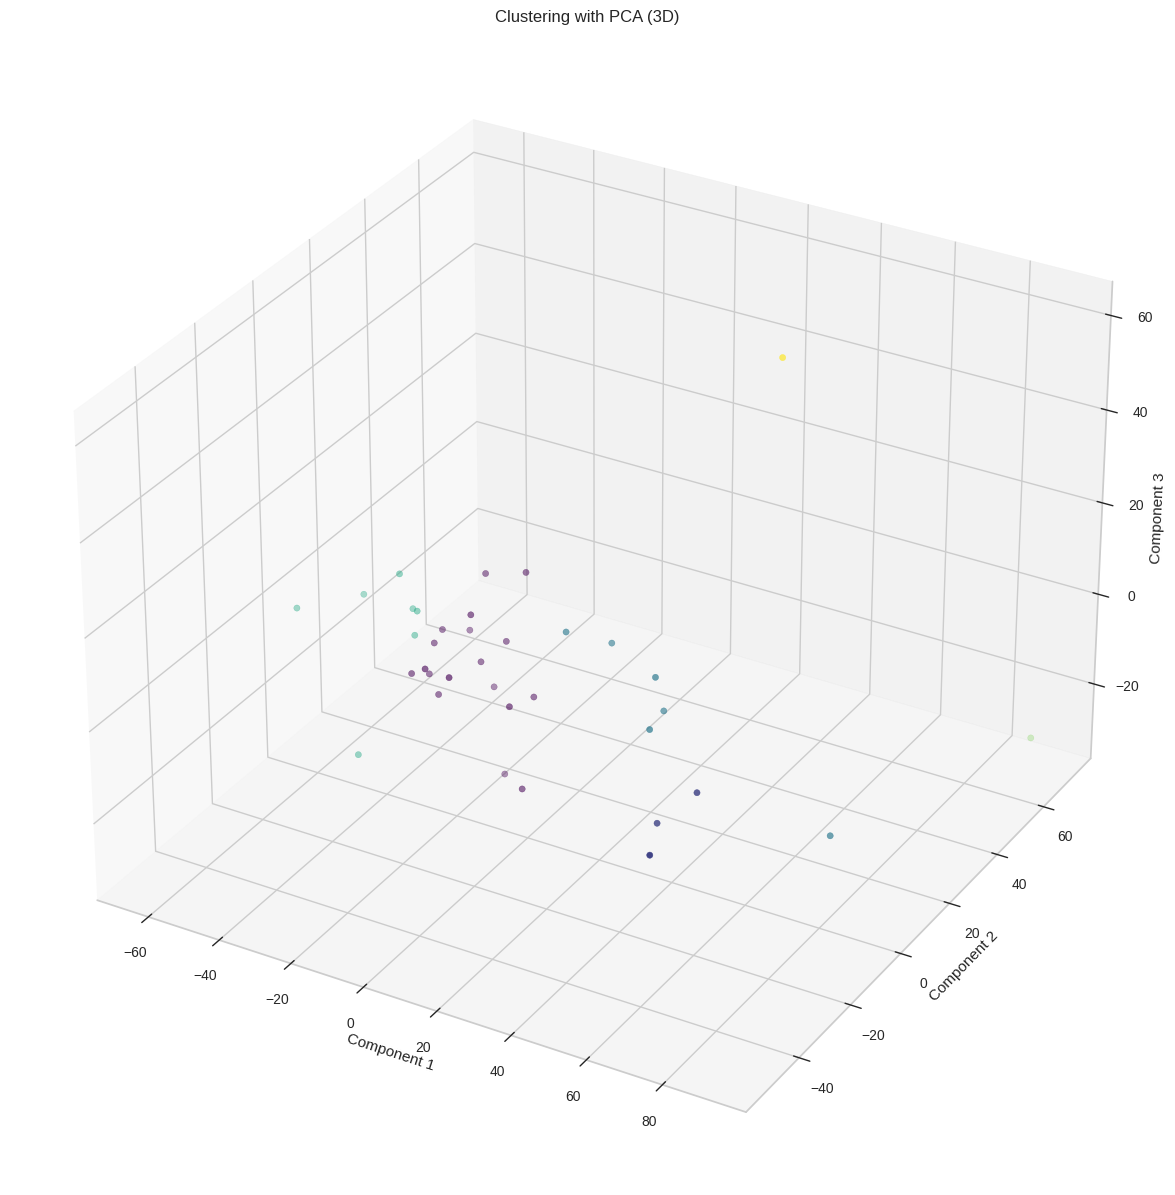

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(111, projection='3d')
pca = PCA(n_components=3)
reduced_data =pca.fit_transform(total_data)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=clusters,cmap='viridis')
#for i, txt in enumerate(total_data.index):
    #ax.text(reduced_data[i, 0], reduced_data[i, 1], reduced_data[i, 2], txt, ha='center', va='center')


ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.title('Clustering with PCA (3D)')
plt.show()

PCA 만 사용하여 차원축소

2차원

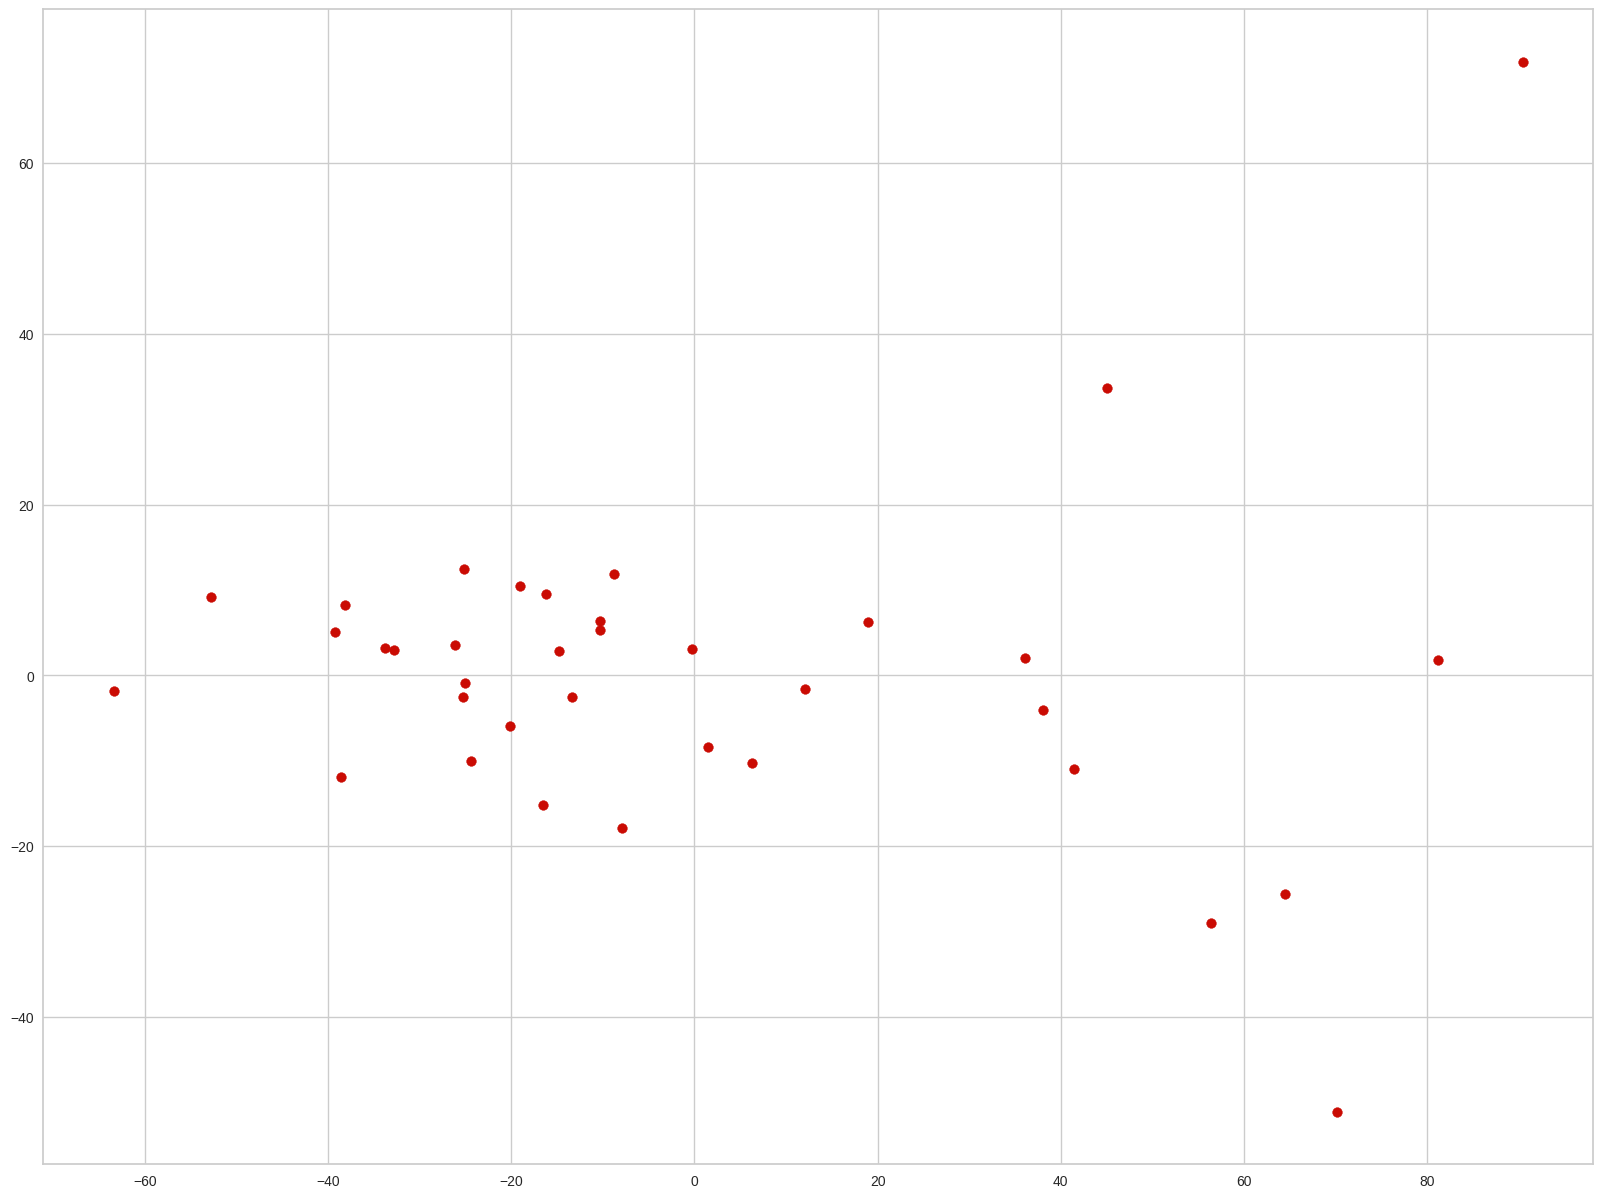

In [21]:
pca = PCA(n_components=2)
pdata_2 = pca.fit_transform(total_data.iloc[:,:-1])
fig = plt.figure(figsize=(20, 15))
plt.scatter(pdata_2[:,0],pdata_2[:, 1],c='r')
#for i, txt in enumerate(total_data.index):
   # plt.text(pdata_2[i, 0], pdata_2[i, 1], txt, ha='center', va='center')
plt.show()

3차원

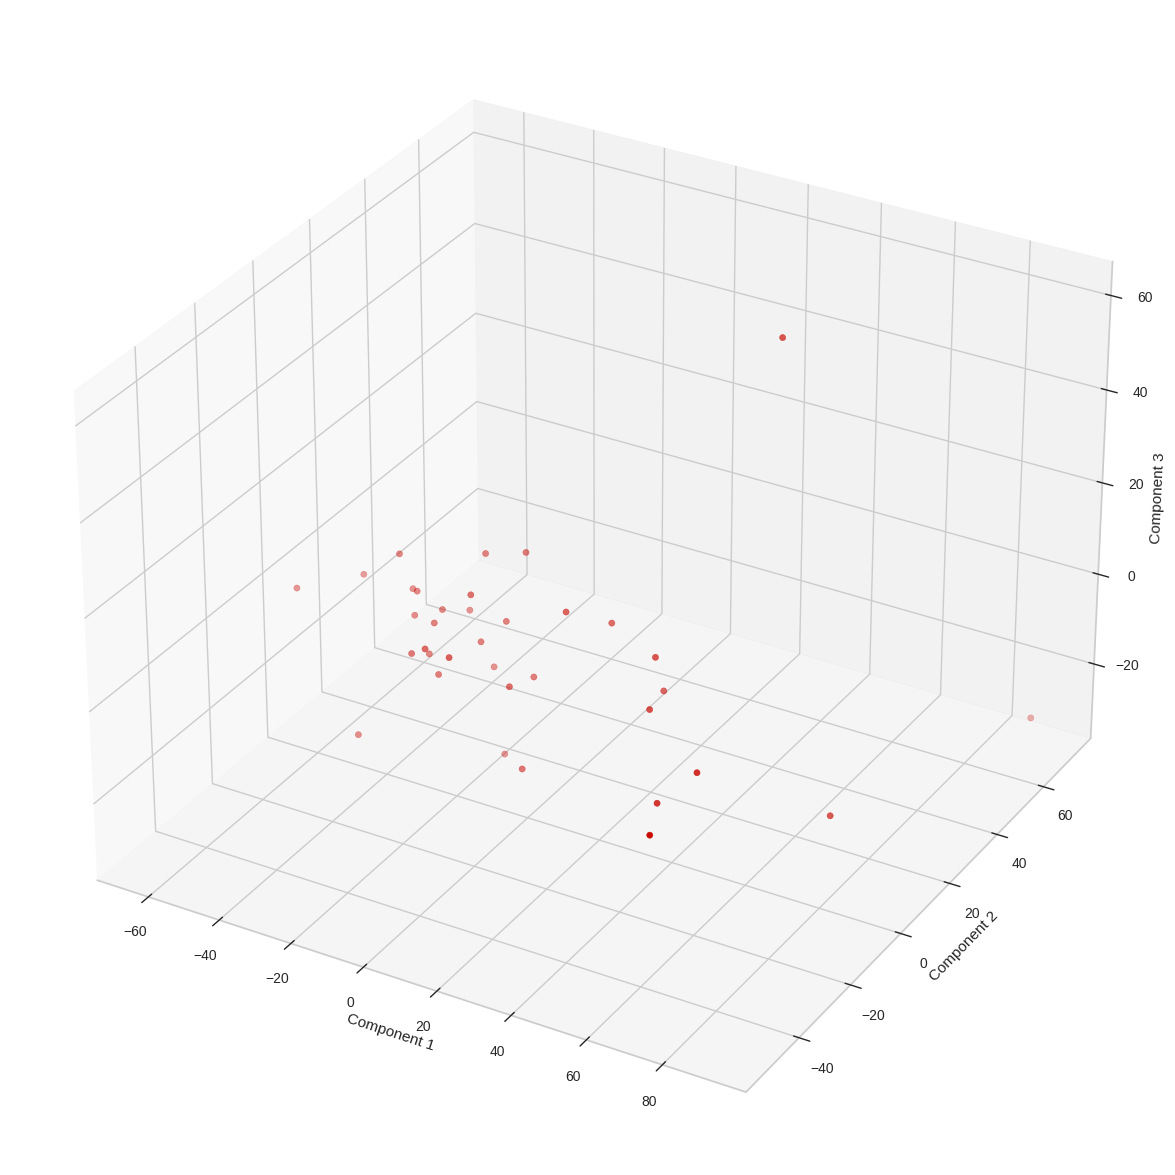

In [16]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
pdata_3 = pca.fit_transform(total_data.iloc[:,:-1])
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pdata_3[:, 0], pdata_3[:, 1], pdata_3[:, 2], c='r')
#for i, txt in enumerate(total_data.index):
    # ax.text(pdata_3[i, 0], pdata_3[i, 1], pdata_3[i, 2], txt, ha='center', va='center')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()

Hierarchical clustering을 이용한 군집화

In [22]:
total_data.iloc[:,:-1]

,,Ever tobacco smokers who quit in last 12 months (%),Current tobacco smokers who tried to quit smoking in the past 12 months (%),Current tobacco smokers who wanted to quit smoking now (%),Ever smokeless tobacco users who quit in last 12 months (%),Current smokeless tobacco users who tried to quit tobacco in the past 12 months (%),Current smokeless tobacco users who wanted to quit tobacco now (%)
State/UT,Area,,,,,,
India,Total,10.6,20.0,20.6,9.4,26.7,24.8
Andaman and Nicobar Islands,Total,19.8,32.9,30.9,4.6,16.3,11.1
Andhra Pradesh,Total,12.8,36.6,30.4,12.2,23.4,36.5
Arunachal Pradesh,Total,22.6,35.1,23.8,17.8,20.4,16.8
Assam,Total,11.6,14.9,22.9,20.0,20.0,17.5
Bihar,Total,5.1,23.6,28.9,1.5,12.4,17.2
Chandigarh,Total,10.4,22.6,13.4,5.7,12.1,14.1
Chhattisgarh,Total,18.5,23.1,29.0,23.7,37.7,21.3
Dadra and Nagar Haweli,Total,22.3,57.1,52.1,80.0,67.4,65.2


Text(0.5, 1.0, 'Dendrogram')

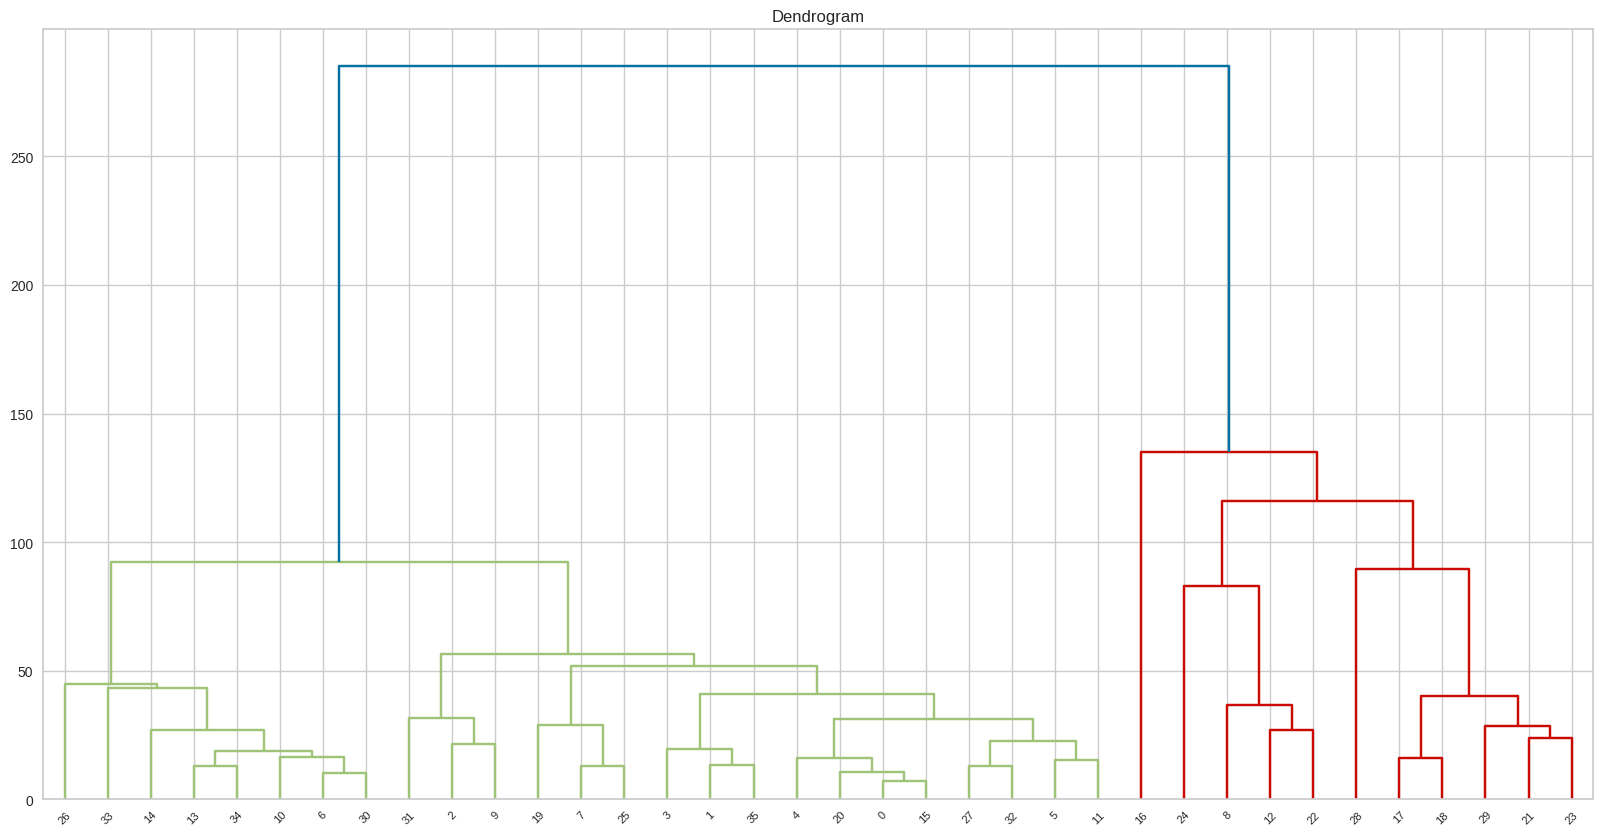

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,10))
c = linkage(total_data.iloc[:,:-1], method = 'ward')
dendrogram = dendrogram(c)
plt.title('Dendrogram')



Agglomerative Clustering 을 이용한 군집화

In [31]:
, publish_display_data
from sklearn.cluster import AgglomerativeClustering
c = AgglomerativeClustering(n_clusters = 6, affinity='euclidean', linkage='ward')
c.fit_predict(total_data.iloc[:,:-1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 4, 1, 0, 1, 4, 1, 0, 4, 4, 1, 5, 3, 3, 1, 1, 3,
       0, 3, 0, 1, 4, 1, 2, 3, 4, 1, 1, 4, 4, 1])

clustering을 통해얻은 레이블 값을 이용한 예측값 학습

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X = total_data.iloc[:, :-1]
y = total_data.iloc[:,-1:]
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
LR = LogisticRegression(random_state=42)
DC = DecisionTreeClassifier(random_state=42, max_depth=8)
Voting = VotingClassifier( estimators=[('lr', LR), ('rf', DC)], voting='hard')
cross_val_score(LR, X, y, cv=5).mean()
LR.fit(X_train, y_train)
feature_LR = LR.coef_[0]
feature_LR

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pytho

array([-0.35575107, -0.99058013,  0.23910308, -0.00100859, -0.14434058,
       -0.10518089])

In [46]:
cross_val_score(DC,X,y, cv=5).mean()
DC.fit(X_train, y_train)
feature_DC = DC.feature_importances_
for i, weight in enumerate(feature_DC):
    feature_name = f"Feature {i+1}"
    print(f"{feature_name}: {weight}")

Feature 1: 0.0
Feature 2: 0.4438473403990646
Feature 3: 0.35030103995621237
Feature 4: 0.1598746081504702
Feature 5: 0.04597701149425287
Feature 6: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [50]:
cross_val_score(Voting, X, y, cv=5).mean()
new_data = [[27.8, 70, 23.1, 81.2, 2.3, 17.5]]
new_DC = DC.predict(new_data)
new_LR = LR.predict(new_data)
print("Predicted Cluster DC:", new_DC[0])
print("Predicted Cluster LR:", new_LR[0])

Predicted Cluster DC: 1
Predicted Cluster LR: 1


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(